# Lead Scoring Case Study

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r".\Leads.csv")
df.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#last 5 rows details
df.tail() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [4]:
#checking how many rows and columns
df.shape 

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
## Checking the column types of the data given
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
## checking for null values
df.isnull().sum() 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

##### separating the given data into numerical and categorical variables
why we are doing this because we can identify easily which variables are numerical and which are categorical variables

In [8]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_data
categorical_data

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,...,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,...,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,SMS Sent,India,Media and Advertising,Select,Unemployed,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,India,Business Administration,Select,Unemployed,...,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,SMS Sent,India,Human Resource Management,Online Search,NaN,...,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,No,No,SMS Sent


In [9]:
# Get the value counts of all the columns

for column in df:
    print(df[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [10]:
#Removing column Prospect ID
df.drop(labels=['Prospect ID','Lead Number'],axis=1,inplace=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Replacing Select with NaN
df.replace('Select',np.NaN,inplace=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
#Checking the  percentage of Null Values in each column
round(100*(df.isna().sum()/len(df)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#Dropping the columns which has more than 40% of null values
df.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)


In [14]:
#Dropping the irrelevant columns
df.drop(['A free copy of Mastering The Interview','I agree to pay the amount through cheque','Tags','Last Notable Activity','Last Activity'],axis=1,inplace=True)

In [15]:
# Again Checking the  percentage of Null Values in each column
round(100*(df.isna().sum()/len(df)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

<Axes: xlabel='TotalVisits', ylabel='Density'>

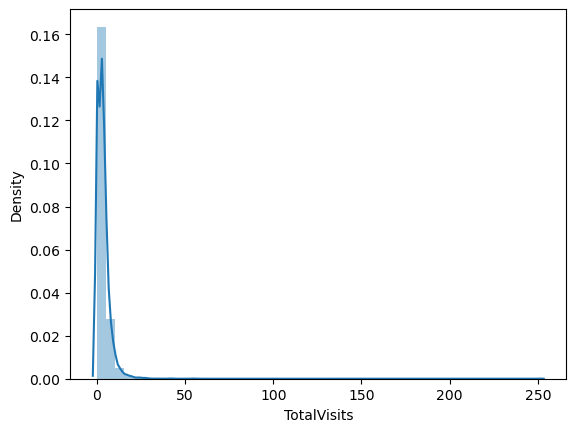

In [16]:
#Checking the distribution for the column TotalVisits
sns.distplot(df.TotalVisits)

In [17]:
#imputing it with the median
df.TotalVisits.fillna(df.TotalVisits.median(),inplace=True)

<Axes: xlabel='Page Views Per Visit', ylabel='Density'>

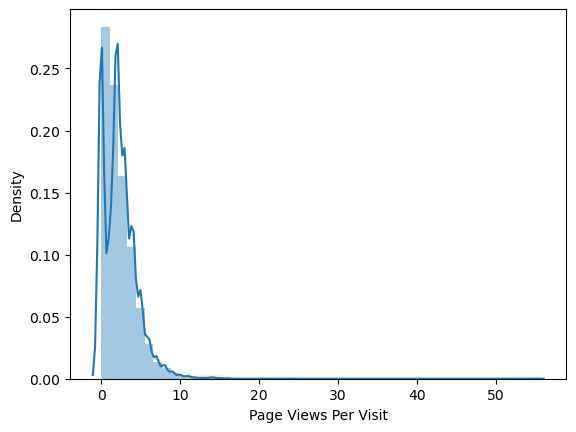

In [18]:
#Checking the distribution of the column Page Views Per Visit
sns.distplot(df['Page Views Per Visit'])

In [19]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

In [20]:
#Rechecking the null values
round(df.isna().sum()/len(df),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Country                                          0.27
Specialization                                   0.37
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [21]:
# droping city and country variables won't be any use in our analysis
df.drop(['City','Country'],axis=1,inplace=True)

In [22]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [23]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [24]:
# Checking the value counts for the Specialization variable
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [25]:
#Checking the values of Specialization column in percentage
100*df.Specialization.value_counts(normalize=True,dropna=False)

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [26]:
#imputing the null values in the Specialization column with the mode
df.Specialization.fillna(df.Specialization.mode()[0],inplace=True)

In [27]:
df['What is your current occupation'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238           NaN
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object>

In [28]:
#imputing the null values in the 'What is your current occupation' column with the mode
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace=True)

In [29]:
# Check the number of null values again
df.isnull().sum()

Lead Origin                                0
Lead Source                               36
Do Not Email                               0
Do Not Call                                0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Specialization                             0
What is your current occupation            0
Search                                     0
Magazine                                   0
Newspaper Article                          0
X Education Forums                         0
Newspaper                                  0
Digital Advertisement                      0
Through Recommendations                    0
Receive More Updates About Our Courses     0
Update me on Supply Chain Content          0
Get updates on DM Content                  0
dtype: int64

In [30]:
df['Lead Source'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object>

For this null values are only 0.3 so we are removeing those rows

In [31]:
# Drop the null values rows in the column 'Lead Source'
df = df[~pd.isnull(df['Lead Source'])]

In [32]:
# Recheck the number of null values 
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Receive More Updates About Our Courses    0
Update me on Supply Chain Content         0
Get updates on DM Content                 0
dtype: int64

In [33]:
#Rechecking the null values
round(df.isna().sum()/len(df),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Courses    0.0
Update me on Supply Chain Content         0.0
Get updates on DM Content                 0.0
dtype: float64

Data is cleaned,so there are no null values

### Model Building

In [34]:
#separating the data into numerical and categorical variables
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_data
categorical_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content
0,API,Olark Chat,No,No,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,Business Administration,Student,No,No,No,No,No,No,No,No,No,No
3,Landing Page Submission,Direct Traffic,No,No,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No
9237,Landing Page Submission,Direct Traffic,Yes,No,Business Administration,Unemployed,No,No,No,No,No,No,No,No,No,No
9238,Landing Page Submission,Google,No,No,Human Resource Management,Unemployed,No,No,No,No,No,No,No,No,No,No


### Numerical Analysis

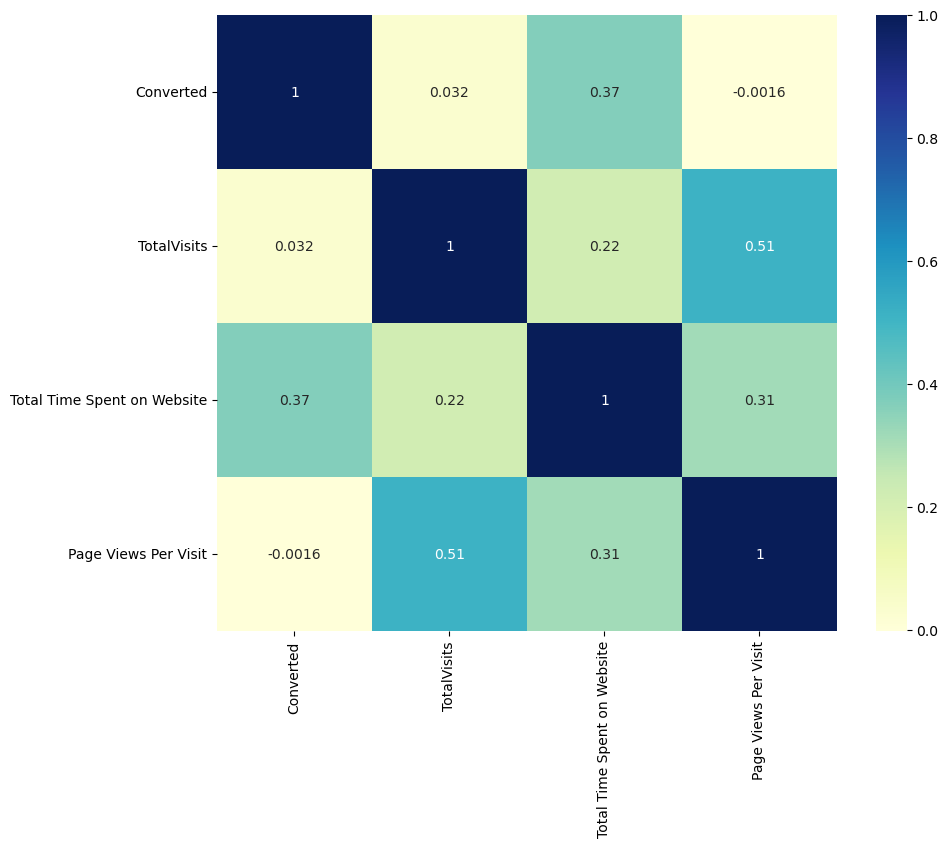

In [35]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [36]:
#Check the % of Data that has Converted Values = 1:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.374619730551935

#### Univariate Analysis

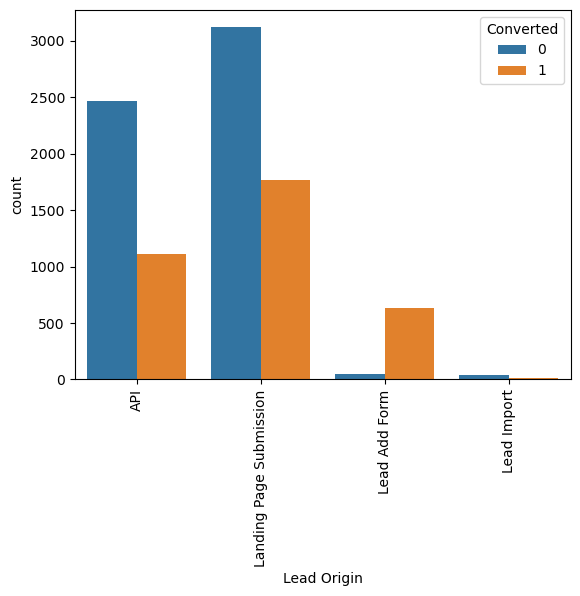

In [37]:
s1=sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

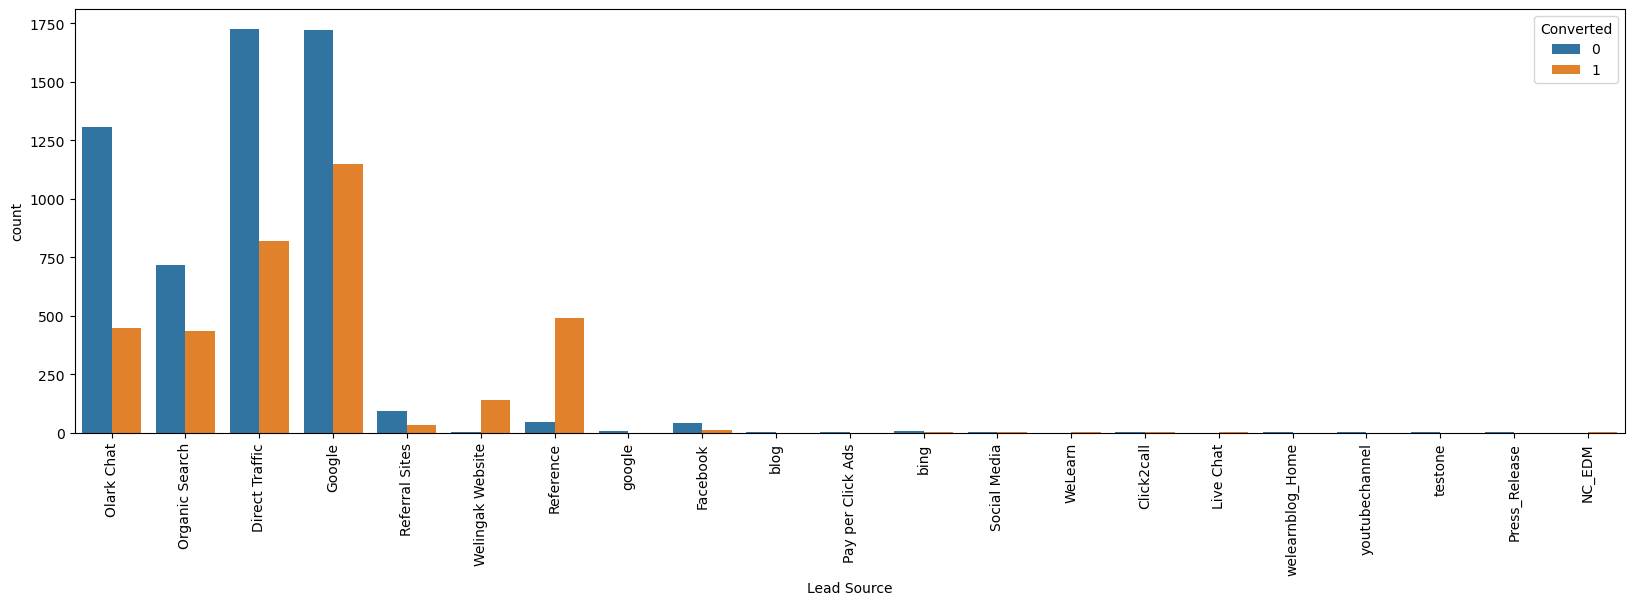

In [38]:
fig, axs = plt.subplots(figsize = (20,5.5))
s2=sns.countplot(x = "Lead Source", hue = "Converted", data = df)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

#### Bivariate Analysis

<Axes: xlabel='Do Not Call', ylabel='count'>

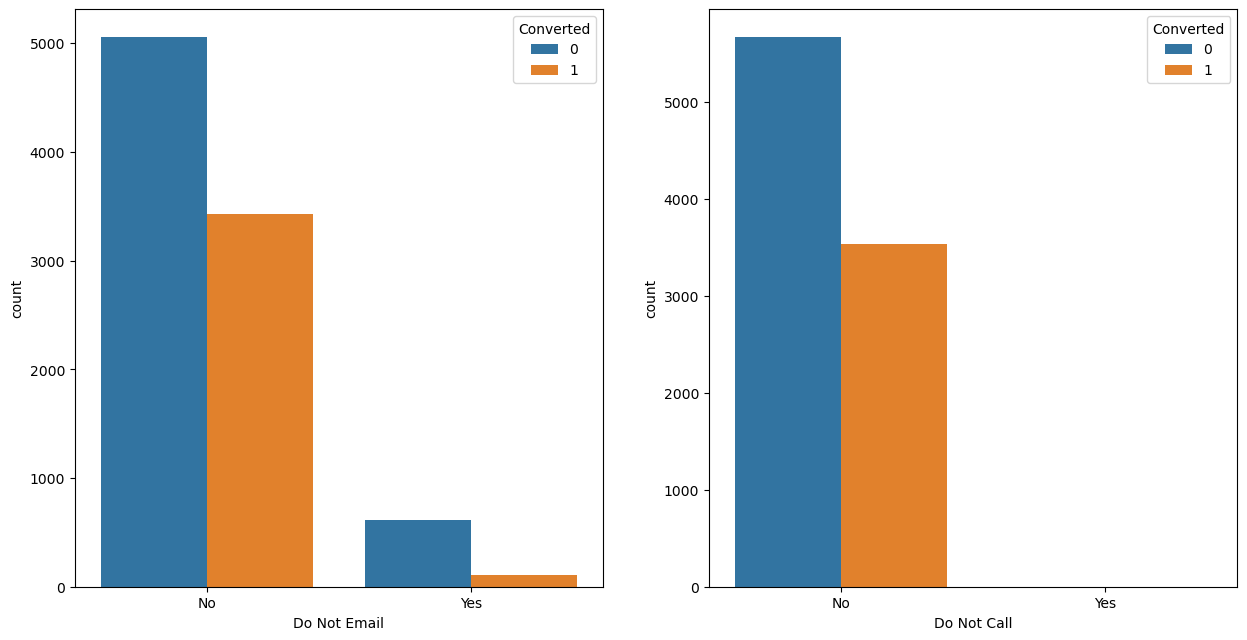

In [39]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

<Axes: >

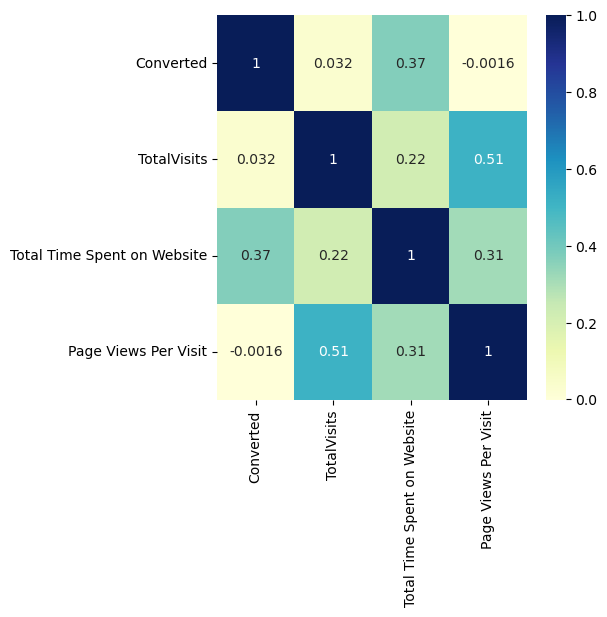

In [40]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)

<Axes: >

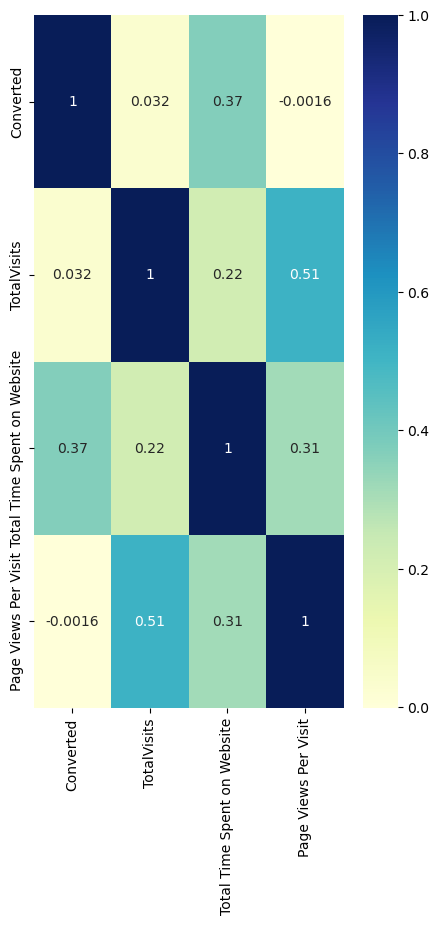

In [41]:
# Visualizing the correlation between all set of columns
plt.figure(figsize=(5, 9))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)

#### Outlier treatment

In [42]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9204.000000
mean        3.449587
std         4.824662
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

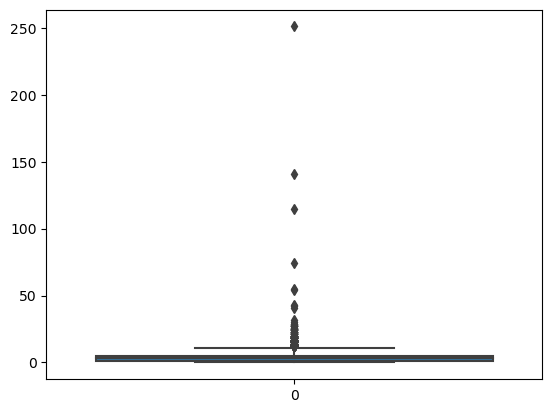

In [43]:
sns.boxplot(df['TotalVisits'])

There is an outliers in the TotalVisits so we can treat them as Remove top & bottom 1% of the Column Outlier values

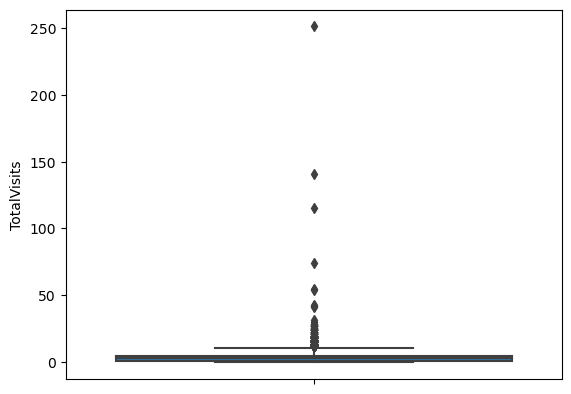

In [44]:
Q3 = df.TotalVisits.quantile(0.99)
leads =df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
leads =df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

The outliers are cleared for TotalVisits

<Axes: xlabel='Converted', ylabel='TotalVisits'>

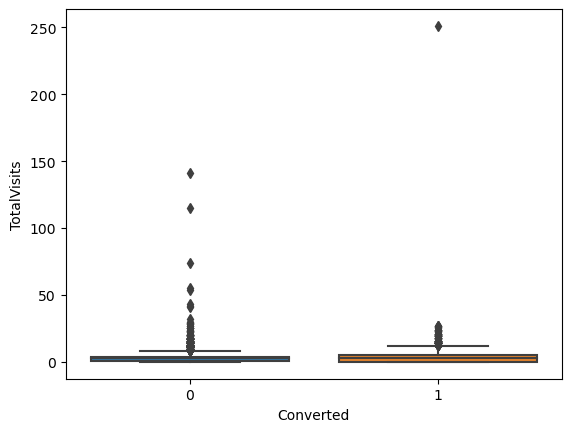

In [45]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

In [46]:
df['Total Time Spent on Website'].describe()

count    9204.000000
mean      489.005541
std       547.980340
min         0.000000
25%        14.000000
50%       250.000000
75%       938.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

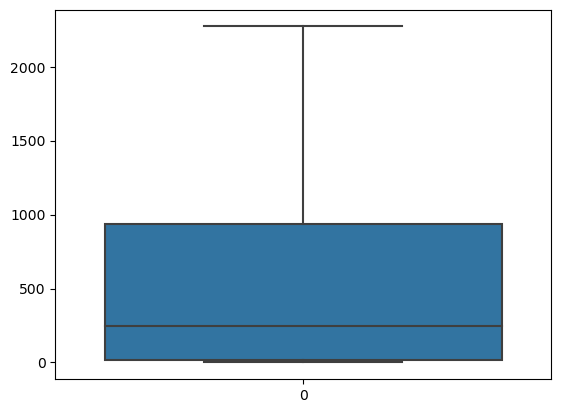

In [47]:
sns.boxplot(df['Total Time Spent on Website'])

There are no major Outliers for the Total Time Spent on Website variable we don't do any Outlier Treatment for this above Column

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

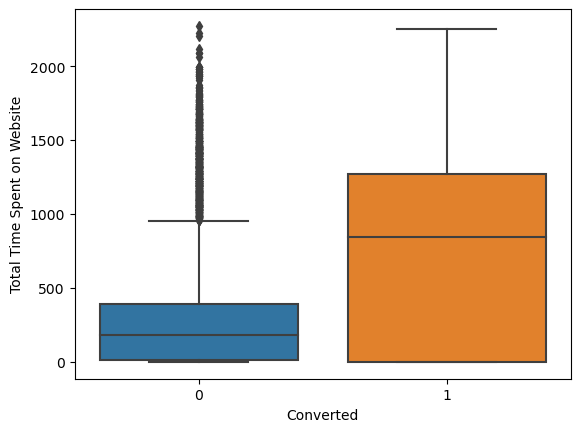

In [48]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

In [49]:
df['Page Views Per Visit'].describe()

count    9204.000000
mean        2.364923
std         2.145999
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

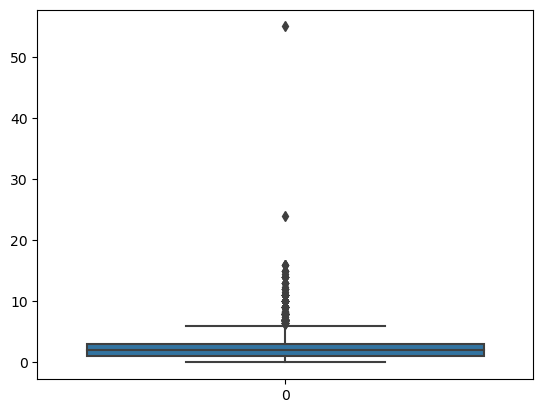

In [50]:
sns.boxplot(df['Page Views Per Visit'])

As we can see there are a number of outliers in the data so We will cap the outliers to 95% value for analysis.

In [51]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

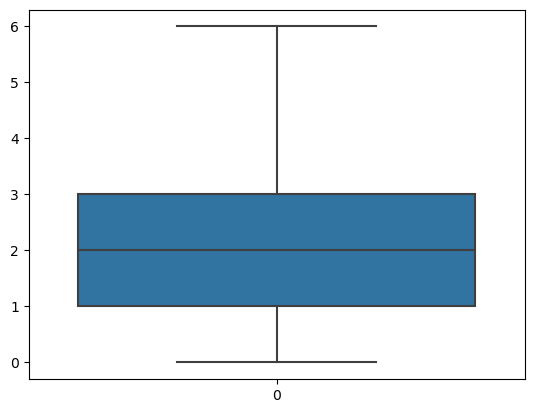

In [52]:
sns.boxplot(df['Page Views Per Visit'])

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

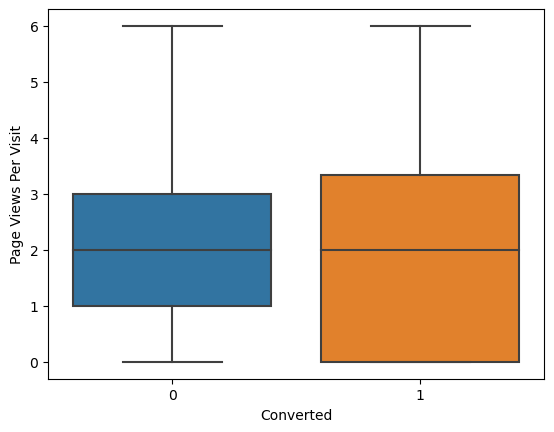

In [53]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [54]:
#checking missing values in leftover columns/
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Courses    0.0
Update me on Supply Chain Content         0.0
Get updates on DM Content                 0.0
dtype: float64

There are no missing values in the other columns to be analyzed further

In [55]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

# Dummy Variable 

In [56]:
#Again getting categorical columns
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content'],
      dtype='object')

In [57]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content']], drop_first=True) 
                               
# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [58]:
# Drop the variables for which the dummy variables have been created

df = df.drop(['Lead Origin', 'Lead Source','Specialization','Magazine','Newspaper','Digital Advertisement','What is your current occupation'], 1)              

In [59]:
# Let's take a look at the dataset again

df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Through Recommendations,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0,0,0.0,0,0.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,No,No,No,No,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0


In [60]:
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'],axis=1,inplace=True)

In [61]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
df.shape

(9204, 56)

#### Test-Train

In [63]:
# Import the required library

from sklearn.model_selection import train_test_split

In [64]:
# Put all the feature variables in X

# Putting target variable in y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [65]:
# Put the target variable in y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [67]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [68]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
5310,0,0.028369,0.044454,0.666667,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2181,0,0.056738,0.115317,1.000000,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8215,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8887,0,0.014184,0.101232,0.333333,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7920,0,0.028369,0.086708,0.666667,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
# Checking the Churn Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.374619730551935

The conversion rate is 38.3%

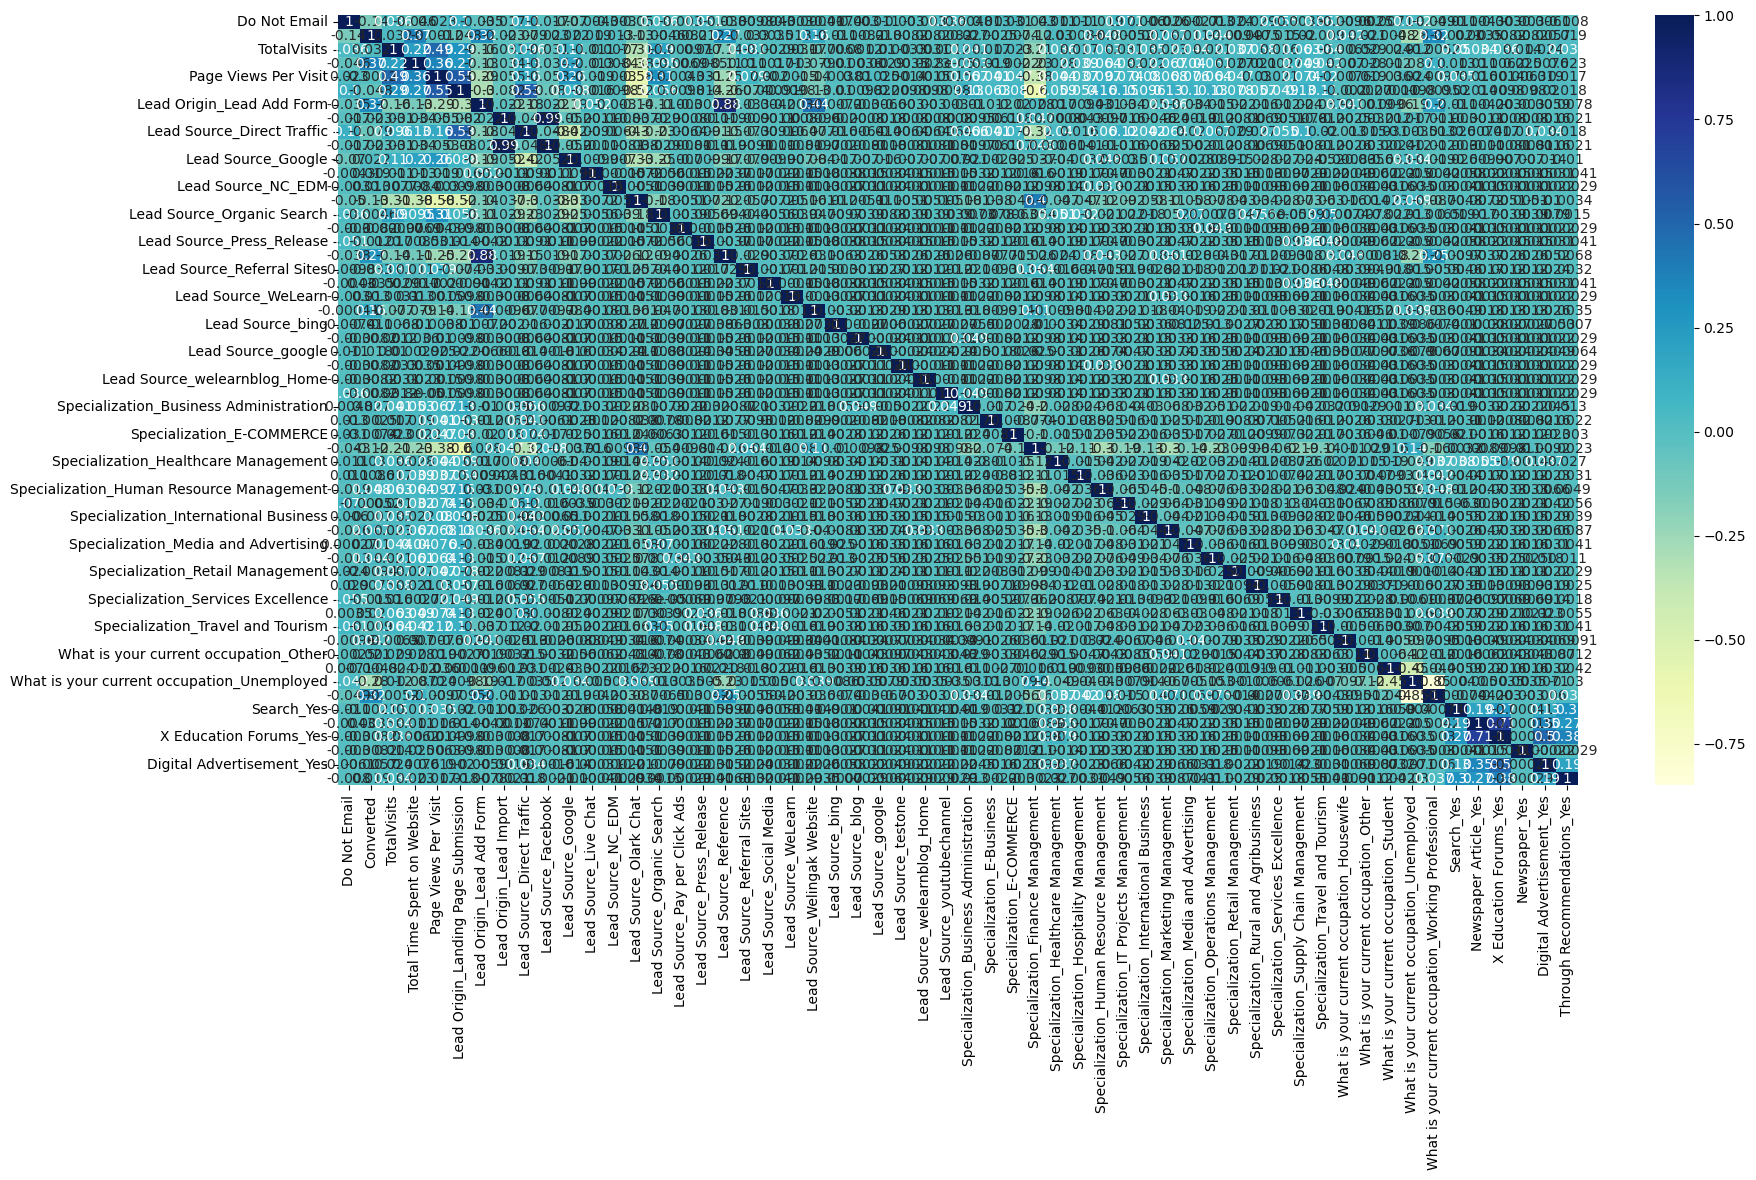

In [70]:
# Let's see the correlation matrix for total data set
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

###  Model Building

In [71]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([ True,  True,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False,  True, False,
       False])

#### Model with statsmodel

In [74]:
# Import statsmodels

import statsmodels.api as sm

In [75]:
# Select only the columns selected by RFE

X_train = X_train

#### Model 1

In [76]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6387
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3005.8
Date:                Tue, 21 Nov 2023   Deviance:                       6011.7
Time:                        14:43:03   Pearson chi2:                 7.88e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3352
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.8244   3.86e+04      0.001      1.000   -7.56e+04    7.57e+04
Do Not Email                                            -1.4322      0.160     -8.972      0.000      -1.745      -1.119
TotalVisits                                              3.1731      1.204      2.636      0.008       0.814       5.532
Total Time Spent on Website                              4.6329      0.158     29.383      0.000       4.324       4.942
Page Views Per Visit                                    -0.1080      0.172     -0.629      0.529      -0.444       0.228
Lead Origin_Landing Page Submission                     -0.2595      0.106     -2.456      0.014      -0.467      -0.052
Lead Origin_Lead Add Form                                1.0975      1.440      0.762      0.446      -1.725       3.920
Lead Origin_Lead Import                                 22.1657   7.87e+04      0.000      1.000   -1.54e+05    1.54e+05
Lead Source_Direct Traffic                             -23.5752   3.86e+04     -0.001      1.000   -7.57e+04    7.56e+04
Lead Source_Facebook                                   -45.6032   8.76e+04     -0.001      1.000   -1.72e+05    1.72e+05
Lead Source_Google                                     -23.1839   3.86e+04     -0.001      1.000   -7.57e+04    7.56e+04
Lead Source_Live Chat                                    1.2931   6.78e+04   1.91e-05      1.000   -1.33e+05    1.33e+05
Lead Source_NC_EDM                                       0.1864   8.81e+04   2.12e-06      1.000   -1.73e+05    1.73e+05
Lead Source_Olark Chat                                 -22.4350   3.86e+04     -0.001      1.000   -7.57e+04    7.56e+04
Lead Source_Organic Search                             -23.3141   3.86e+04     -0.001      1.000   -7.57e+04    7.56e+04
Lead Source_Pay per Click Ads                          -45.2857   8.82e+04     -0.001      1.000   -1.73e+05    1.73e+05
Lead Source_Press_Release                              -45.2391   6.48e+04     -0.001      0.999   -1.27e+05    1.27e+05
Lead Source_Reference                                  -20.6950   3.86e+04     -0.001      1.000   -7.57e+04    7.56e+04
Lead Source_Referral Sites                             -23.6036   3.86e+04     -0.001      1.000   -7.57e+04    7.56e+04
Lead Source_Social Media                               -22.5341   3.86e+04     -0.001      1.000   -7.57e+04    7.56e+04
Lead Source_WeLearn                                     -0.3010   8.72e+04  -3.45e-06      1.000   -1.71e+05    1.71e+05
Lead Source_Welingak Website                           -17.5393   3.86e+04     -0.000      1.000   -7.57e+04    7.56e+04
Lead Source_bing                                       -22

In [77]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
47,What is your current occupation_Unemployed,937.48
9,Lead Source_Google,337.32
7,Lead Source_Direct Traffic,295.17
12,Lead Source_Olark Chat,198.54
13,Lead Source_Organic Search,136.98
5,Lead Origin_Lead Add Form,127.54
16,Lead Source_Reference,87.61
48,What is your current occupation_Working Profes...,83.55
8,Lead Source_Facebook,39.97
6,Lead Origin_Lead Import,34.33


In [79]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

#### Model 2

In [80]:
# Refit the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6388
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Nov 2023   Deviance:                   1.4009e+05
Time:                        14:43:06   Pearson chi2:                 6.85e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -5.759e+14   5.65e+07  -1.02e+07      0.000   -5.76e+14   -5.76e+14
Do Not Email                                         -5.485e+14   3.17e+06  -1.73e+08      0.000   -5.48e+14   -5.48e+14
TotalVisits                                           1.163e+15   3.38e+07   3.44e+07      0.000    1.16e+15    1.16e+15
Total Time Spent on Website                           3.696e+15   3.91e+06   9.46e+08      0.000     3.7e+15     3.7e+15
Page Views Per Visit                                 -3.202e+13   4.55e+06  -7.04e+06      0.000    -3.2e+13    -3.2e+13
Lead Origin_Landing Page Submission                  -5.864e+14   2.81e+06  -2.09e+08      0.000   -5.86e+14   -5.86e+14
Lead Origin_Lead Add Form                             2.493e+15   4.76e+07   5.24e+07      0.000    2.49e+15    2.49e+15
Lead Origin_Lead Import                               4.788e+15   6.84e+07      7e+07      0.000    4.79e+15    4.79e+15
Lead Source_Direct Traffic                             1.05e+15   4.77e+07    2.2e+07      0.000    1.05e+15    1.05e+15
Lead Source_Facebook                                 -3.554e+15   8.25e+07  -4.31e+07      0.000   -3.55e+15   -3.55e+15
Lead Source_Google                                    1.388e+15   4.77e+07   2.91e+07      0.000    1.39e+15    1.39e+15
Lead Source_Live Chat                                 4.285e+15   4.76e+07      9e+07      0.000    4.28e+15    4.28e+15
Lead Source_NC_EDM                                    5.085e+15   8.24e+07   6.17e+07      0.000    5.09e+15    5.09e+15
Lead Source_Olark Chat                               -9.104e+14   4.77e+07  -1.91e+07      0.000    -9.1e+14    -9.1e+14
Lead Source_Organic Search                             1.21e+15   4.77e+07   2.54e+07      0.000    1.21e+15    1.21e+15
Lead Source_Pay per Click Ads                        -5.096e+15   8.24e+07  -6.18e+07      0.000    -5.1e+15    -5.1e+15
Lead Source_Press_Release                            -3.643e+15   6.75e+07  -5.39e+07      0.000   -3.64e+15   -3.64e+15
Lead Source_Referral Sites                            1.018e+15   4.82e+07   2.11e+07      0.000    1.02e+15    1.02e+15
Lead Source_Social Media                              -1.21e+13   6.74e+07  -1.79e+05      0.000   -1.21e+13   -1.21e+13
Lead Source_WeLearn                                   9.596e+15   8.24e+07   1.16e+08      0.000     9.6e+15     9.6e+15
Lead Source_Welingak Website                          3.788e+14   7.66e+06   4.94e+07      0.000    3.79e+14    3.79e+14
Lead Source_bing                                     -5.218e+13   5.83e+07  -8.95e+05      0.000   -5.22e+13   -5.22e+13
Lead Source_blog                                       -48

In [81]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
46,What is your current occupation_Unemployed,834.53
9,Lead Source_Google,299.38
7,Lead Source_Direct Traffic,262.13
12,Lead Source_Olark Chat,176.08
13,Lead Source_Organic Search,121.72
47,What is your current occupation_Working Profes...,74.22
5,Lead Origin_Lead Add Form,71.90
8,Lead Source_Facebook,39.33
6,Lead Origin_Lead Import,34.33
45,What is your current occupation_Student,21.04


In [82]:
# Droping `What is your current occupation_Housewife`.
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

#### Model 3

In [83]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6389
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Nov 2023   Deviance:                   1.7665e+05
Time:                        14:43:08   Pearson chi2:                 8.64e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.636e+14    5.2e+07   5.07e+06      0.000    2.64e+14    2.64e+14
Do Not Email                                           1.15e+15   3.17e+06   3.63e+08      0.000    1.15e+15    1.15e+15
TotalVisits                                           1.019e+15   3.38e+07   3.01e+07      0.000    1.02e+15    1.02e+15
Total Time Spent on Website                           1.956e+15   3.91e+06   5.01e+08      0.000    1.96e+15    1.96e+15
Page Views Per Visit                                  1.702e+15   4.54e+06   3.74e+08      0.000     1.7e+15     1.7e+15
Lead Origin_Landing Page Submission                   3.744e+13   2.81e+06   1.33e+07      0.000    3.74e+13    3.74e+13
Lead Origin_Lead Add Form                             2.302e+15   4.76e+07   4.84e+07      0.000     2.3e+15     2.3e+15
Lead Origin_Lead Import                               9.087e+15   6.84e+07   1.33e+08      0.000    9.09e+15    9.09e+15
Lead Source_Direct Traffic                           -9.661e+14   4.77e+07  -2.02e+07      0.000   -9.66e+14   -9.66e+14
Lead Source_Facebook                                 -7.148e+15   8.25e+07  -8.66e+07      0.000   -7.15e+15   -7.15e+15
Lead Source_Google                                   -4.872e+14   4.77e+07  -1.02e+07      0.000   -4.87e+14   -4.87e+14
Lead Source_Live Chat                                 5.039e+15   4.76e+07   1.06e+08      0.000    5.04e+15    5.04e+15
Lead Source_NC_EDM                                    3.644e+15   8.24e+07   4.42e+07      0.000    3.64e+15    3.64e+15
Lead Source_Olark Chat                               -2.959e+14   4.77e+07   -6.2e+06      0.000   -2.96e+14   -2.96e+14
Lead Source_Organic Search                           -1.042e+15   4.77e+07  -2.18e+07      0.000   -1.04e+15   -1.04e+15
Lead Source_Pay per Click Ads                        -5.615e+15   8.24e+07  -6.81e+07      0.000   -5.61e+15   -5.61e+15
Lead Source_Press_Release                            -6.408e+15   6.75e+07  -9.49e+07      0.000   -6.41e+15   -6.41e+15
Lead Source_Referral Sites                           -1.059e+15   4.82e+07  -2.19e+07      0.000   -1.06e+15   -1.06e+15
Lead Source_Social Media                              2.497e+15   6.74e+07    3.7e+07      0.000     2.5e+15     2.5e+15
Lead Source_WeLearn                                   5.907e+15   8.24e+07   7.17e+07      0.000    5.91e+15    5.91e+15
Lead Source_Welingak Website                          1.154e+15   7.66e+06   1.51e+08      0.000    1.15e+15    1.15e+15
Lead Source_bing                                      1.364e+15   5.83e+07   2.34e+07      0.000    1.36e+15    1.36e+15
Lead Source_blog                                        41

In [84]:
# The column Lead Source_google seems to have high p-value
X_train.drop(['Lead Source_google'],1,inplace=True)

#### Model 4

In [85]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6390
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Nov 2023   Deviance:                   1.2646e+05
Time:                        14:43:09   Pearson chi2:                 6.18e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -5.262e+14   3.46e+07  -1.52e+07      0.000   -5.26e+14   -5.26e+14
Do Not Email                                         -1.895e+14   3.17e+06  -5.98e+07      0.000    -1.9e+14    -1.9e+14
TotalVisits                                           1.811e+15   3.38e+07   5.35e+07      0.000    1.81e+15    1.81e+15
Total Time Spent on Website                           5.073e+15   3.91e+06    1.3e+09      0.000    5.07e+15    5.07e+15
Page Views Per Visit                                  9.204e+13   4.54e+06   2.03e+07      0.000     9.2e+13     9.2e+13
Lead Origin_Landing Page Submission                  -1.399e+14   2.81e+06  -4.98e+07      0.000    -1.4e+14    -1.4e+14
Lead Origin_Lead Add Form                             2.923e+15   2.77e+07   1.05e+08      0.000    2.92e+15    2.92e+15
Lead Origin_Lead Import                               3.937e+15   6.84e+07   5.75e+07      0.000    3.94e+15    3.94e+15
Lead Source_Direct Traffic                           -4.286e+14   2.75e+07  -1.56e+07      0.000   -4.29e+14   -4.29e+14
Lead Source_Facebook                                 -2.687e+15   7.27e+07  -3.69e+07      0.000   -2.69e+15   -2.69e+15
Lead Source_Google                                    2.199e+14   2.75e+07   7.99e+06      0.000     2.2e+14     2.2e+14
Lead Source_Live Chat                                 5.578e+15   4.76e+07   1.17e+08      0.000    5.58e+15    5.58e+15
Lead Source_NC_EDM                                    6.855e+15   7.26e+07   9.44e+07      0.000    6.85e+15    6.85e+15
Lead Source_Olark Chat                                6.236e+14   2.77e+07   2.25e+07      0.000    6.24e+14    6.24e+14
Lead Source_Organic Search                           -2.385e+13   2.76e+07  -8.65e+05      0.000   -2.39e+13   -2.39e+13
Lead Source_Pay per Click Ads                        -2.861e+15   7.26e+07  -3.94e+07      0.000   -2.86e+15   -2.86e+15
Lead Source_Press_Release                            -4.567e+15   5.51e+07  -8.29e+07      0.000   -4.57e+15   -4.57e+15
Lead Source_Referral Sites                           -4.375e+14   2.85e+07  -1.54e+07      0.000   -4.38e+14   -4.38e+14
Lead Source_Social Media                              1.767e+15    5.5e+07   3.21e+07      0.000    1.77e+15    1.77e+15
Lead Source_WeLearn                                   7.051e+14   7.26e+07   9.71e+06      0.000    7.05e+14    7.05e+14
Lead Source_Welingak Website                          3.869e+14   7.66e+06   5.05e+07      0.000    3.87e+14    3.87e+14
Lead Source_bing                                      1.851e+14   4.34e+07   4.26e+06      0.000    1.85e+14    1.85e+14
Lead Source_blog                                        10

In [86]:
# The column Lead Source_Olark Chat seems to have a high p-value
X_train.drop(['Specialization_Retail Management'],1,inplace=True)

#### Model 5

In [87]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6391
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Nov 2023   Deviance:                   2.6397e+05
Time:                        14:43:10   Pearson chi2:                 1.29e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.162e+14   3.46e+07  -9.15e+06      0.000   -3.16e+14   -3.16e+14
Do Not Email                                         -1.124e+15   3.17e+06  -3.55e+08      0.000   -1.12e+15   -1.12e+15
TotalVisits                                           -8.76e+14   3.38e+07  -2.59e+07      0.000   -8.76e+14   -8.76e+14
Total Time Spent on Website                           1.362e+15    3.9e+06   3.49e+08      0.000    1.36e+15    1.36e+15
Page Views Per Visit                                 -5.101e+14   4.54e+06  -1.12e+08      0.000    -5.1e+14    -5.1e+14
Lead Origin_Landing Page Submission                  -6.908e+13   2.81e+06  -2.46e+07      0.000   -6.91e+13   -6.91e+13
Lead Origin_Lead Add Form                             9.751e+14   2.77e+07   3.52e+07      0.000    9.75e+14    9.75e+14
Lead Origin_Lead Import                               2.643e+15   6.84e+07   3.86e+07      0.000    2.64e+15    2.64e+15
Lead Source_Direct Traffic                            4.281e+14   2.75e+07   1.55e+07      0.000    4.28e+14    4.28e+14
Lead Source_Facebook                                 -3.142e+15   7.27e+07  -4.32e+07      0.000   -3.14e+15   -3.14e+15
Lead Source_Google                                     3.15e+14   2.75e+07   1.14e+07      0.000    3.15e+14    3.15e+14
Lead Source_Live Chat                                 3.842e+15   4.76e+07   8.07e+07      0.000    3.84e+15    3.84e+15
Lead Source_NC_EDM                                    1.844e+15   7.26e+07   2.54e+07      0.000    1.84e+15    1.84e+15
Lead Source_Olark Chat                                3.537e+14   2.77e+07   1.28e+07      0.000    3.54e+14    3.54e+14
Lead Source_Organic Search                            5.429e+14   2.76e+07   1.97e+07      0.000    5.43e+14    5.43e+14
Lead Source_Pay per Click Ads                        -4.759e+15   7.26e+07  -6.55e+07      0.000   -4.76e+15   -4.76e+15
Lead Source_Press_Release                            -6.746e+13   5.51e+07  -1.22e+06      0.000   -6.75e+13   -6.75e+13
Lead Source_Referral Sites                            3.525e+14   2.85e+07   1.24e+07      0.000    3.52e+14    3.52e+14
Lead Source_Social Media                             -1.198e+15    5.5e+07  -2.18e+07      0.000    -1.2e+15    -1.2e+15
Lead Source_WeLearn                                   2.703e+15   7.26e+07   3.72e+07      0.000     2.7e+15     2.7e+15
Lead Source_Welingak Website                          6.353e+13   7.66e+06   8.29e+06      0.000    6.35e+13    6.35e+13
Lead Source_bing                                      8.876e+14   4.34e+07   2.04e+07      0.000    8.88e+14    8.88e+14
Lead Source_blog                                        -4

In [88]:
# The column What is your current occupation_Working Professional seems to have a high p-value
X_train.drop(['What is your current occupation_Student'],1,inplace=True)

#### Model 6

In [89]:
# Refit the model with the new set of features

logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6392
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3014.7
Date:                Tue, 21 Nov 2023   Deviance:                       6029.5
Time:                        14:43:10   Pearson chi2:                 7.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3334
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4380      1.216     -1.183      0.237      -3.820       0.944
Do Not Email                                            -1.4427      0.159     -9.052      0.000      -1.755      -1.130
TotalVisits                                              3.1138      1.198      2.600      0.009       0.766       5.461
Total Time Spent on Website                              4.6168      0.157     29.352      0.000       4.309       4.925
Page Views Per Visit                                    -0.1091      0.171     -0.638      0.524      -0.444       0.226
Lead Origin_Landing Page Submission                     -0.2650      0.105     -2.513      0.012      -0.472      -0.058
Lead Origin_Lead Add Form                                4.0400      1.198      3.372      0.001       1.692       6.388
Lead Origin_Lead Import                                 21.2457   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Direct Traffic                               0.0971      1.180      0.082      0.934      -2.216       2.411
Lead Source_Facebook                                   -21.0183   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.4859      1.179      0.412      0.680      -1.826       2.798
Lead Source_Live Chat                                   21.0291   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      22.8557   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.2241      1.186      1.032      0.302      -1.101       3.549
Lead Source_Organic Search                               0.3601      1.182      0.305      0.761      -1.956       2.676
Lead Source_Pay per Click Ads                          -20.6222   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Press_Release                              -20.5585   3.17e+04     -0.001      0.999   -6.22e+04    6.21e+04
Lead Source_Referral Sites                               0.0753      1.215      0.062      0.951      -2.307       2.457
Lead Source_Social Media                                 1.1403      2.036      0.560      0.575      -2.850       5.131
Lead Source_WeLearn                                     22.4093   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website                             3.1842      1.029      3.093      0.002       1.166       5.202
Lead Source_bing                                         0.6607      1.661      0.398      0.691      -2.595       3.916
Lead Source_blog                                     -8.89

In [90]:
# The column What is your current occupation_Other seems to have a high p-value
X_train.drop(['Newspaper_Yes'],1,inplace=True)

#### Model 7

In [91]:
# Refit the model with the new set of features

logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3016.2
Date:                Tue, 21 Nov 2023   Deviance:                       6032.3
Time:                        14:43:11   Pearson chi2:                 7.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3331
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4247      1.215     -1.172      0.241      -3.807       0.957
Do Not Email                                            -1.4408      0.159     -9.043      0.000      -1.753      -1.128
TotalVisits                                              3.0732      1.196      2.570      0.010       0.729       5.417
Total Time Spent on Website                              4.6080      0.157     29.330      0.000       4.300       4.916
Page Views Per Visit                                    -0.1091      0.171     -0.638      0.523      -0.444       0.226
Lead Origin_Landing Page Submission                     -0.2679      0.105     -2.541      0.011      -0.474      -0.061
Lead Origin_Lead Add Form                                4.0305      1.198      3.365      0.001       1.683       6.378
Lead Origin_Lead Import                                 21.2427   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Direct Traffic                               0.0896      1.180      0.076      0.940      -2.223       2.402
Lead Source_Facebook                                   -21.0211   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.4816      1.179      0.408      0.683      -1.830       2.793
Lead Source_Live Chat                                   21.0312   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      22.8520   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.2164      1.186      1.026      0.305      -1.108       3.541
Lead Source_Organic Search                               0.3559      1.182      0.301      0.763      -1.960       2.672
Lead Source_Pay per Click Ads                          -20.6300   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Press_Release                              -20.5633   3.17e+04     -0.001      0.999   -6.22e+04    6.22e+04
Lead Source_Referral Sites                               0.0722      1.215      0.059      0.953      -2.309       2.454
Lead Source_Social Media                                 1.1322      2.036      0.556      0.578      -2.858       5.122
Lead Source_WeLearn                                     22.4056   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website                             3.1856      1.029      3.094      0.002       1.168       5.203
Lead Source_bing                                         0.6542      1.661      0.394      0.694      -2.601       3.909
Lead Source_blog                                     -1.64

In [92]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
42,What is your current occupation_Unemployed,38.79
6,Lead Origin_Lead Import,34.31
8,Lead Source_Facebook,34.28
9,Lead Source_Google,22.93
7,Lead Source_Direct Traffic,20.47
12,Lead Source_Olark Chat,12.40
28,Specialization_Finance Management,12.00
13,Lead Source_Organic Search,10.24
3,Page Views Per Visit,6.81
4,Lead Origin_Landing Page Submission,5.96


In [93]:
# Predicting the train variables
X_train_sm = sm.add_constant(X_train)
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.105441
2181    0.226463
8215    0.217678
8887    0.126489
7920    0.158275
4947    0.937603
3073    0.473239
2722    0.926274
499     0.217678
8330    0.953496
dtype: float64

In [94]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:9]

array([0.10544087, 0.22646296, 0.21767838, 0.12648852, 0.1582751 ,
       0.93760271, 0.47323885, 0.92627373, 0.21767838])

In [95]:
# Create a new dataframe containing the actual churn flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.105441
1,0,0.226463
2,0,0.217678
3,0,0.126489
4,0,0.158275


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [96]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.105441,0
1,0,0.226463,0
2,0,0.217678,0
3,0,0.126489,0
4,0,0.158275,0


###  Model Evaluation

In [97]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [98]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3428  472]
 [ 887 1655]]


#### Accuracy

In [99]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7890406705991928


In [100]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### sensitivity

In [101]:
# Calculate the sensitivity

TP/(TP+FN)

0.6510621557828482

#### specificity

In [102]:
# Calculate the specificity

TN/(TN+FP)

0.8789743589743589

In [103]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [105]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

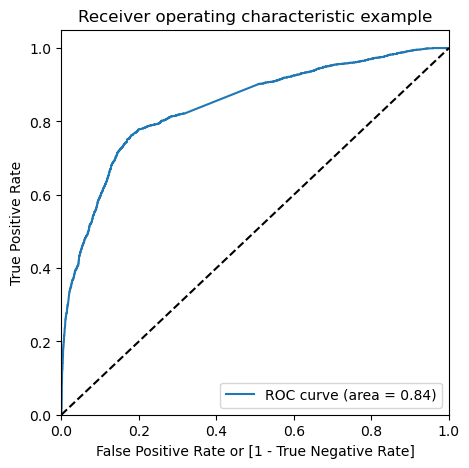

In [106]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [107]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.105441,0,1,1,0,0,0,0,0,0,0,0
1,0,0.226463,0,1,1,1,0,0,0,0,0,0,0
2,0,0.217678,0,1,1,1,0,0,0,0,0,0,0
3,0,0.126489,0,1,1,0,0,0,0,0,0,0,0
4,0,0.158275,0,1,1,0,0,0,0,0,0,0,0


In [108]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394598  1.000000  0.000000
0.1   0.1  0.463676  0.987805  0.122051
0.2   0.2  0.633654  0.908340  0.454615
0.3   0.3  0.790593  0.778521  0.798462
0.4   0.4  0.799441  0.717152  0.853077
0.5   0.5  0.789041  0.651062  0.878974
0.6   0.6  0.774449  0.568057  0.908974
0.7   0.7  0.754424  0.461448  0.945385
0.8   0.8  0.729432  0.353659  0.974359
0.9   0.9  0.685501  0.213611  0.993077


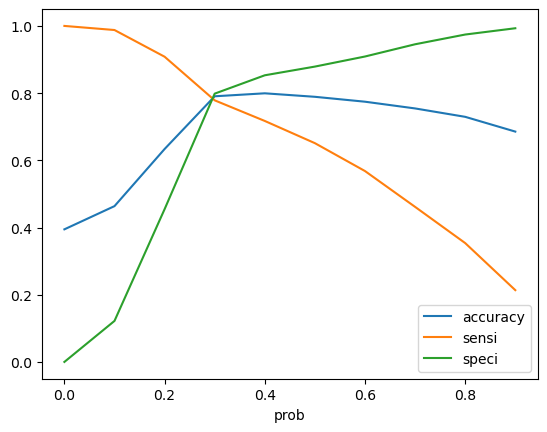

In [109]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [110]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.105441,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.226463,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.217678,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.126489,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.158275,0,1,1,0,0,0,0,0,0,0,0,0


#### Accuracy

In [111]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7905929835454828

In [112]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3114,  786],
       [ 563, 1979]], dtype=int64)

In [113]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [114]:
# Calculate Sensitivity

TP/(TP+FN)

0.7785208497246263

#### Specificity

In [115]:
# Calculate Specificity

TN/(TN+FP)

0.7984615384615384

### Predicitons on the train set.

In [116]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [117]:
# Select the columns in X_train for X_test as well

X_test = X_test
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
2400,0,0.028369,0.423856,0.666667,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
849,0,0.085106,0.029930,0.500000,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7459,0,0.014184,0.058539,0.333333,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6184,1,0.021277,0.233715,0.500000,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4869,0,0.014184,0.581426,0.333333,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [118]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [119]:
# Check X_test_sm

X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
2400,1.0,0,0.028369,0.423856,0.666667,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
849,1.0,0,0.085106,0.029930,0.500000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7459,1.0,0,0.014184,0.058539,0.333333,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6184,1.0,1,0.021277,0.233715,0.500000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4869,1.0,0,0.014184,0.581426,0.333333,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,1.0,0,0.028369,0.091549,0.666667,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1051,1.0,0,0.028369,0.613556,0.666667,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8707,1.0,0,0.049645,0.264085,0.388333,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9103,1.0,0,0.007092,0.301937,0.166667,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [120]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
X_test =X_test[X_train.columns]
y_test_pred = res.predict(sm.add_constant(X_test))

In [121]:
y_test_pred[:10]

2400    0.561860
849     0.276083
7459    0.083404
6184    0.121188
4869    0.960078
2519    0.685074
5419    0.186677
2103    0.534093
3987    0.217678
3512    0.296912
dtype: float64

In [122]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
# Let's see the head

y_pred_1.head()

,0
2400,0.561860
849,0.276083
7459,0.083404
6184,0.121188
4869,0.960078


In [124]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [125]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.561860
1,0,0.276083
2,0,0.083404
3,1,0.121188
4,1,0.960078


In [128]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [129]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.561860
1,0,0.276083
2,0,0.083404
3,1,0.121188
4,1,0.960078


In [130]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1432,  340],
       [ 220,  770]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### sensitivity

In [133]:
# Calculate sensitivity
TP / float(TP+FN)

0.7777777777777778

#### Specificity

In [134]:
# Calculate specificity
TN / float(TN+FP)

0.8081264108352144

### Build the training model using the precision and recall view

In [135]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3428,  472],
       [ 887, 1655]], dtype=int64)

##### Precision
TP / TP + FP

In [136]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7780912082745651

##### Recall
TP / TP + FN

In [137]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6510621557828482

### Precision and recall tradeoff

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6437    1
 6438    1
 6439    1
 6440    0
 6441    0
 Name: Converted, Length: 6442, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6437    1
 6438    1
 6439    1
 6440    1
 6441    1
 Name: Predicted, Length: 6442, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

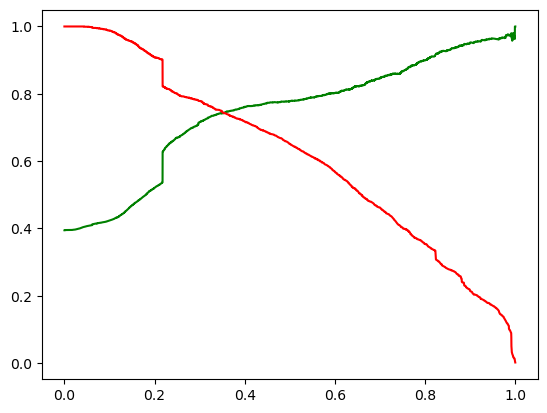

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.105441,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.226463,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.217678,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.126489,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.158275,0,1,1,0,0,0,0,0,0,0,0,0


#### Accuracy

In [143]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7905929835454828

In [144]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3114,  786],
       [ 563, 1979]], dtype=int64)

In [145]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Precision

In [146]:
# Calculate Precision

TP/(TP+FP)

0.7157323688969258

#### Recall

In [147]:
# Calculate Recall

TP/(TP+FN)

0.7785208497246263

In [148]:
X_test.shape

(2762, 49)

In [149]:
X_train.shape

(6442, 49)

In [150]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specializ

In [151]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specializ

In [152]:
X_test =X_test[X_train.columns]

### Predicitons on the test set.

In [153]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

2400    0.561860
849     0.276083
7459    0.083404
6184    0.121188
4869    0.960078
2519    0.685074
5419    0.186677
2103    0.534093
3987    0.217678
3512    0.296912
dtype: float64

In [154]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2400,0.561860
849,0.276083
7459,0.083404
6184,0.121188
4869,0.960078


In [155]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
2400,1
849,0
7459,0
6184,1
4869,1


In [156]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.561860
1,0,0.276083
2,0,0.083404
3,1,0.121188
4,1,0.960078


In [158]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.561860
1,0,0.276083
2,0,0.083404
3,1,0.121188
4,1,0.960078


In [159]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.561860,1
1,0,0.276083,0
2,0,0.083404,0
3,1,0.121188,0
4,1,0.960078,1


#### Accuracy

In [160]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7972483707458363

In [161]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1432,  340],
       [ 220,  770]], dtype=int64)

In [162]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Precision

In [163]:
# Calculate Precision

TP/(TP+FP)

0.6936936936936937

#### Recall

In [164]:
# Calculate Recall

TP/(TP+FN)

0.7777777777777778

Final Observation:
Let us compare the values obtained for Train & Test:

Train Data:

Accuracy    : 78%
Sensitivity :76%
Specificity : 80%
Precision   :72%
Recall      :76%

Test Data:

Accuracy    : 80%
Sensitivity : 70%
Specificity : 86%
Precision   : 74%
Recall      : 69%

With the current cut off as 0.3 we have Precision around 73% and Recall around 72%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model